**Data Science and AI for Energy Systems** 

Karlsruhe Institute of Technology

Institute of Automation and Applied Informatics

Summer Term 2024

---

# Exercise VIII Explainable Artificial Intelligence XAI

**Imports**

In [26]:
#!pip install shap
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
import shap
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

***
**(a) Create a plot for feature ranking and a partial dependency plot.**


First we have to load the dataset on which we have to train the model. You can download the dataset from https://bwsyncandshare.kit.edu/s/QPySS7eZCWjSjYP?path=%2FExercise-8 . This dataset contains 9 features and Load_type is the target feature. The details of the dataset is available here https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption.

In [144]:
df = pd.read_csv('Steel_industry_data.csv',  parse_dates=True) 
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


Remove the features "CO2(tCO2), Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM,date, Load_Type" from the dataset and store the target feature "Load_type" in a separate field. Train the LinearRegression model on this dataset. 
(Note: Some features are categorical in nature, so we need to do pre-processing)

In [164]:
#pre-processing the dataset.......
df['WeekStatus'] = pd.factorize( df['WeekStatus'] )[0]
df['Day_of_week']= pd.factorize( df['Day_of_week'] )[0]
df['Load_Type']= pd.factorize( df['Load_Type'] )[0]


featuresNames=['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Day_of_week']

data=df[featuresNames]
target=df['Load_Type']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [165]:
#train LinearRegression......
lr = LinearRegression()
model = lr.fit(X_train, y_train)

Create a shap explainer

In [182]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 11565it [00:17, 296.97it/s]                                                                                                           


Feature importance

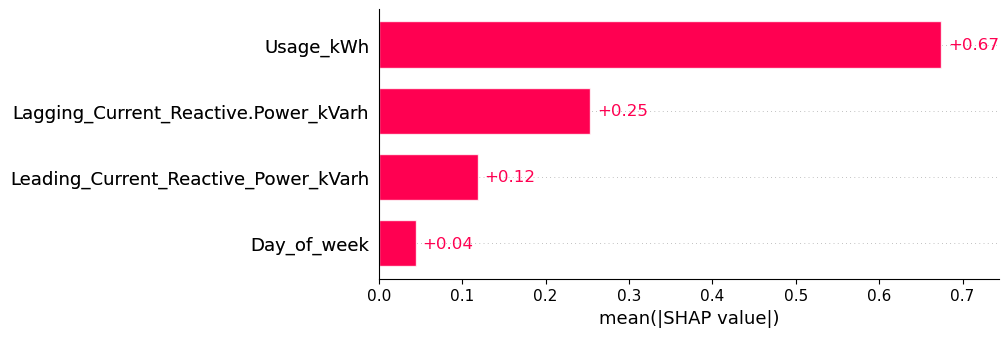

In [167]:
shap.plots.bar(shap_values)

PDPs

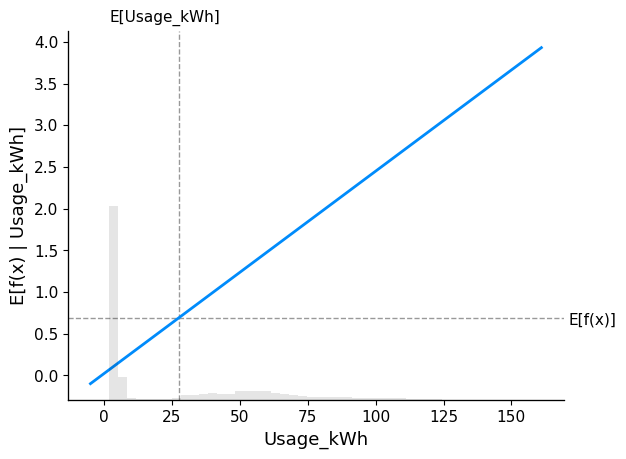

In [168]:
shap.partial_dependence_plot(
    "Usage_kWh",
    model.predict,
    X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

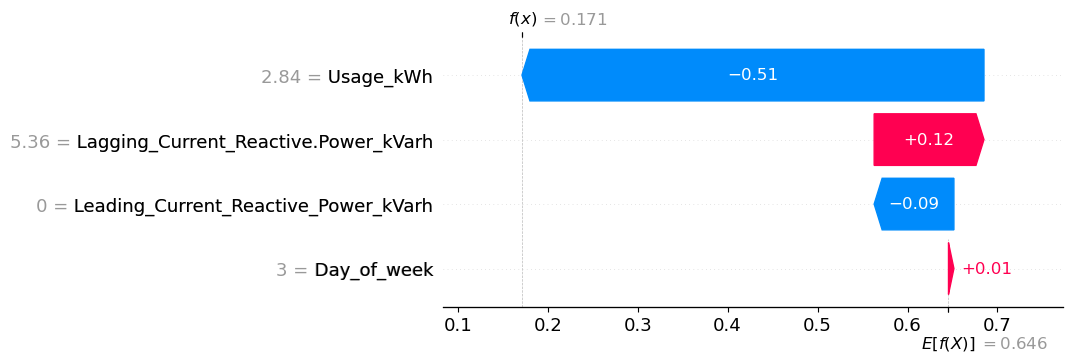

In [169]:
shap.plots.waterfall(shap_values[12], max_display=14)
#Expected value: 0.646

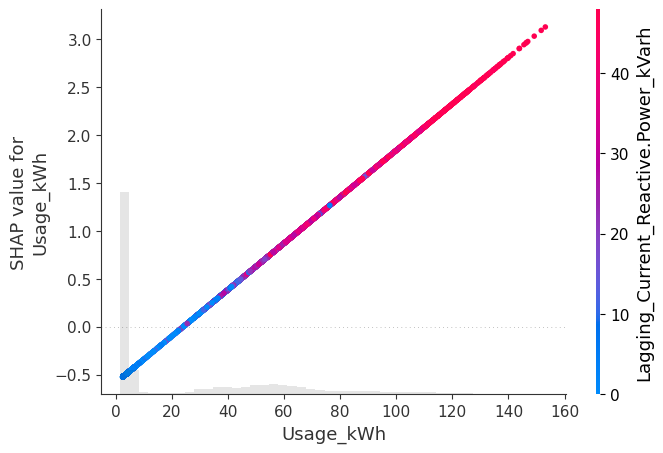

In [186]:
shap.plots.scatter(shap_values[:, "Usage_kWh"], color=shap_values)

***
**(b). Test two properties of Shapley values:**

• Null/dummy

• Efficiency


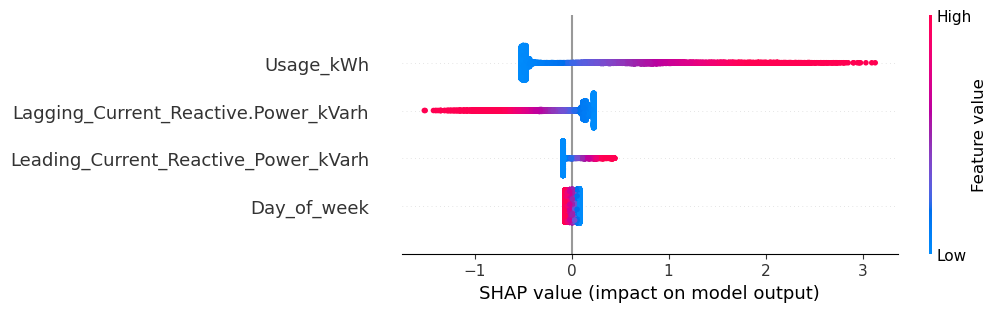

In [187]:
shap.plots.beeswarm(shap_values)

***
**(c). Use more of the data provided by adding additional features to the model (previously removed features) and create new feature rankings and partial dependency plots.**

• What has changed?

• If we wanted to keep the number of features small, which features do we use in a
reduced model? in a reduced model?

In [191]:
featuresNames=['Usage_kWh', 'Day_of_week', 'Leading_Current_Reactive_Power_kVarh',
        'Lagging_Current_Power_Factor', 'CO2(tCO2)', 'NSM']

featuresNames=['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Day_of_week',
               'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

data=df[featuresNames]


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)


In [192]:
clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(X_train,y_train)

In [193]:
explainer = shap.Explainer(clf.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 11565it [00:54, 171.43it/s]                                                                                                           


Feature Importance

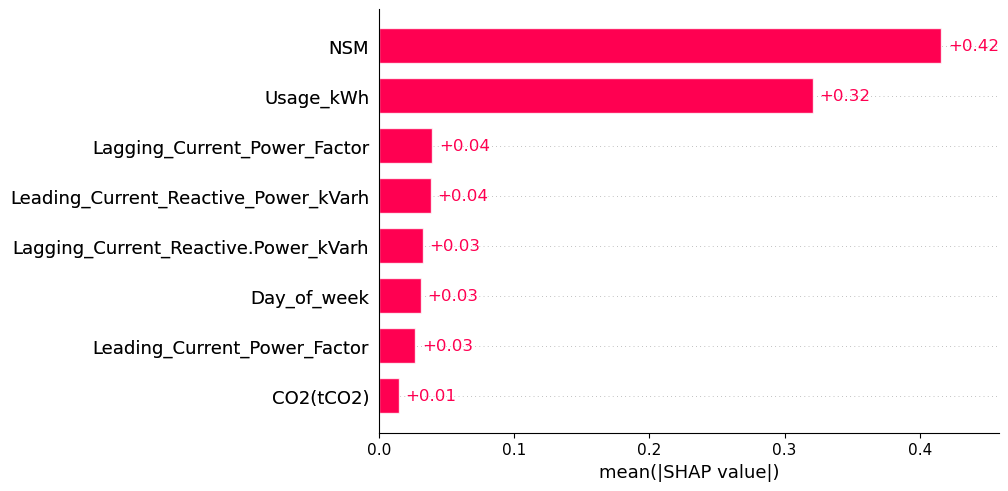

In [157]:
shap.plots.bar(shap_values)

PDPs

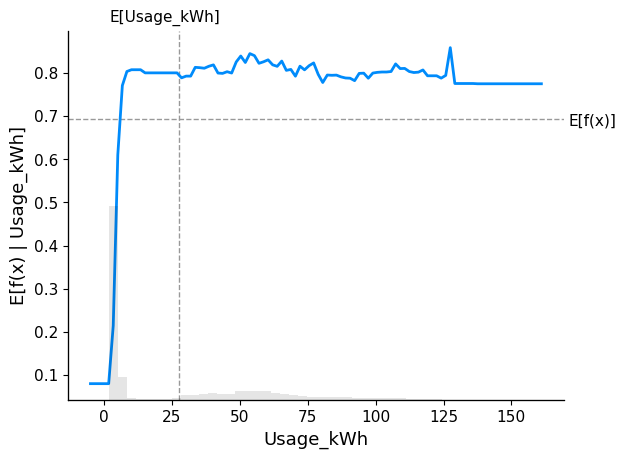

In [159]:
shap.partial_dependence_plot(
    "Usage_kWh",
    clf.predict,
    X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

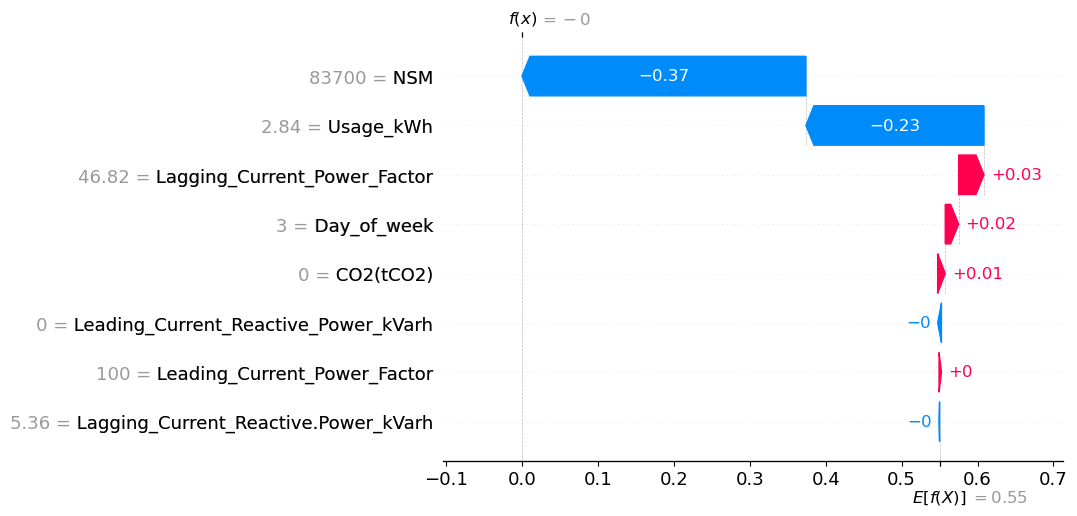

In [161]:
shap.plots.waterfall(shap_values[12], max_display=14)

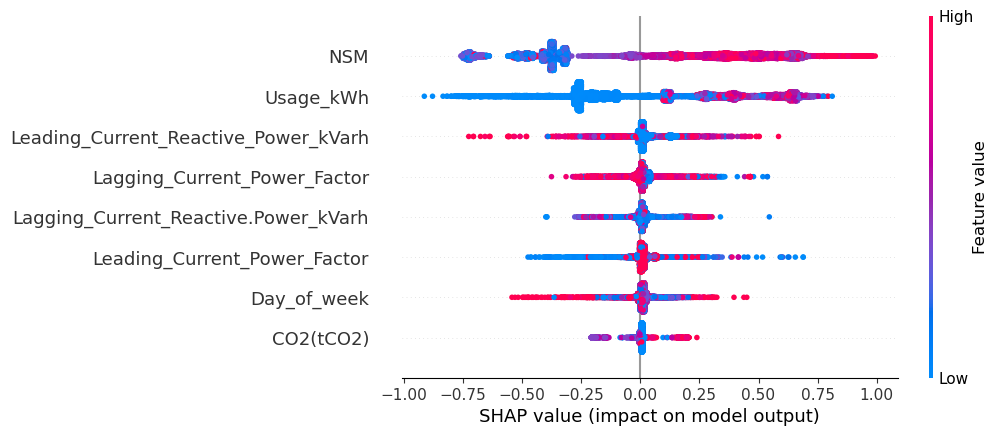

In [194]:
shap.plots.beeswarm(shap_values)